# Approximate the sine function with a polynomial of degree 3

In this notebook, we will be gradually moving up in the abstraction ladder:
- 1. Bare Numpy (You need to compute the gradient by hand)
- 2. Autograd (Here you do not need to compute the gradient by hand anymore)
- 3. torch.nn (Using the nn Abstraction in pytorch)
- 4. Optimizer Abstraction (Finally, we don't even need to iterate on the parameters to update them)

Here is the solution if you have some difficulties: https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

## Tensors
### Warm-up: numpy
Before introducing PyTorch, we will first implement the network using numpy.

Numpy provides an n-dimensional array object, and many functions for manipulating these arrays. Numpy is a generic framework for scientific computing; it does not know anything about computation graphs, or deep learning, or gradients. However we can easily use numpy to fit a third order polynomial to sine function by manually implementing the forward and backward passes through the network using numpy operations:

If you are not familiar with numpy, you can read this cheat sheet: https://www.datacamp.com/cheat-sheet/numpy-cheat-sheet-data-analysis-in-python

In [3]:
import matplotlib.pyplot as plt

def plot(y_pred, y, x):
    plt.plot(x, y, label='y (actual)')
    plt.plot(x, y_pred, label='y_pred (predicted)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

In [95]:
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 1000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-3
epochs = 2000
for t in range(epochs):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b*x + c*x**2 + d*x**3

    # Computing the loss is not necessary in numpy
    # But it will be necessary in Pytorch
    diff = y_pred - y
    loss = (diff**2).mean()
    if t % 100 == 99:
        print(t, loss)

    # compute the gradients of the loss (mean squared error loss) wrt a, b, c, d
    # Here we calculate the difference for each point and then calculate a gradient for each point.
    # Take a pen and paper!
    # Warning: y_pred is a vector, and grad_a should be the mean gradient of each component of y_pred/
    

    """
    # Implementation 2: Take the mean of grads only 
    # WHY CORRECT
    # Check reason 1 above
    """
    dl_dy = 2*diff
    grad_a = dl_dy.mean()
    grad_b = (dl_dy * x).mean()
    grad_c = (dl_dy * (x**2)).mean()
    grad_d = (dl_dy * (x**3)).mean()

    

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d
    
print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')
# Tip: If if does not work, try to use .mean() instead of .sum()

99 1.3651161427242815
199 1.1295273077043875
299 0.9352717786156898
399 0.774779248767066
499 0.6421429889740132
599 0.5324962623502026
699 0.44182802898125095
799 0.36683156954757706
899 0.3047800438083722
999 0.25342416520895533
1099 0.2109080393362904
1199 0.1756999238687279
1299 0.1465352494665869
1399 0.1223697179516571
1499 0.10234068512248647
1599 0.0857353561910602
1699 0.07196458482424394
1799 0.060541282540436614
1899 0.05106262227042653
1999 0.043195365219301264
Result: y = 0.2385596547825055 + 0.6971880200896813 x + -0.04111261113679254 x^2 + -0.07063541939937906 x^3


In [96]:
# Trying out different ways to aggregate the gradient!


"""
    Implementation 1: dl_dy is mean. And then for each grad_{} we also take the mean of the whole (which shouldn't change things much even
    if it's kinda unnecessary?)
    WHY WRONG: 
    1. Taking the mean of dl_dy because it's a derivative of MSE doesn't make sense. If you actually do the derivative calculation by hand, 
    you'll notice that the mean disappears while doing so.
    2. Plus, taking the mean of dl_dy first instead of the whole equation's mean together leads to very different results.
    """
    # dl_dy = (2*diff).mean()
    # grad_a = dl_dy.mean()
    # grad_b = (dl_dy * x).mean()
    # grad_c = (dl_dy * (x**2)).mean()
    # grad_d = (dl_dy * (x**3)).mean()
"""
    # Implementation 3: Take mean of dl_dy and grads separately
    Why wrong: Check reason 2 in implementation 1
    """
    # dl_dy = (2*diff).mean()
    # grad_a = dl_dy
    # grad_b = dl_dy * x.mean()
    # grad_c = dl_dy * (x**2).mean()
    # grad_d = dl_dy * (x**3).mean()

'\n    # Implementation 3: Take mean of dl_dy and grads separately\n    Why wrong: Check reason 2 in implementation 1\n    '

Interpret the results. If the results are correct, move on to the next exercise.

Note:
- in the correction, they use a learning_rate = 1e-6 and then sum the gradients.
- Here we use a learning_rate = 1e-3 and then average the gradients.


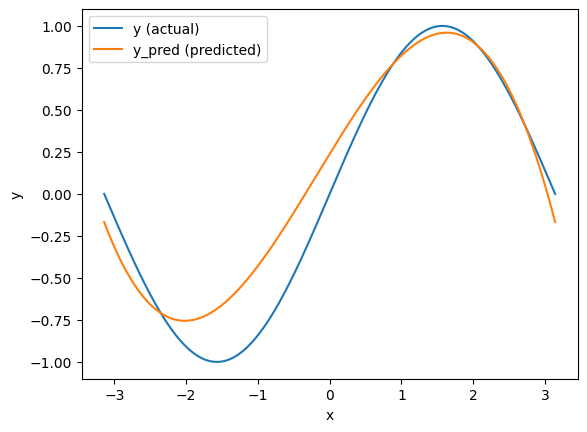

In [97]:
# Check with the plot!
plot(y_pred, y, x)

### PyTorch: Tensors
Numpy is a great framework, but it cannot utilize GPUs to accelerate its numerical computations. For modern deep neural networks, GPUs often provide speedups of 50x or greater, so unfortunately numpy won’t be enough for modern deep learning.

Here we introduce the most fundamental PyTorch concept: the Tensor. A PyTorch Tensor is conceptually identical to a numpy array: a Tensor is an n-dimensional array, and PyTorch provides many functions for operating on these Tensors. Behind the scenes, Tensors can keep track of a computational graph and gradients, but they’re also useful as a generic tool for scientific computing.

Also unlike numpy, PyTorch Tensors can utilize GPUs to accelerate their numeric computations. To run a PyTorch Tensor on GPU, you simply need to specify the correct device.

Here we use PyTorch Tensors to fit a third order polynomial to sine function. Like the numpy example above we need to manually implement the forward and backward passes through the network.

**Note:** This is very close to the numpy implementation, and is more a translation exercise than one where you need to think a lot. We're just doing things step by step.

You can check the pytorch cheat sheet to get back into the swing of things: https://pytorch.org/tutorials/beginner/ptcheat.html

99 tensor(1.6505)
199 tensor(1.3524)
299 tensor(1.1085)
399 tensor(0.9090)
499 tensor(0.7456)
599 tensor(0.6119)
699 tensor(0.5024)
799 tensor(0.4127)
899 tensor(0.3393)
999 tensor(0.2791)
1099 tensor(0.2298)
1199 tensor(0.1894)
1299 tensor(0.1562)
1399 tensor(0.1291)
1499 tensor(0.1068)
1599 tensor(0.0885)
1699 tensor(0.0735)
1799 tensor(0.0612)
1899 tensor(0.0511)
1999 tensor(0.0428)
Result: y = -0.1693611741065979 + 0.6364201903343201 x + 0.029187167063355446 x^2 + -0.06200040504336357 x^3


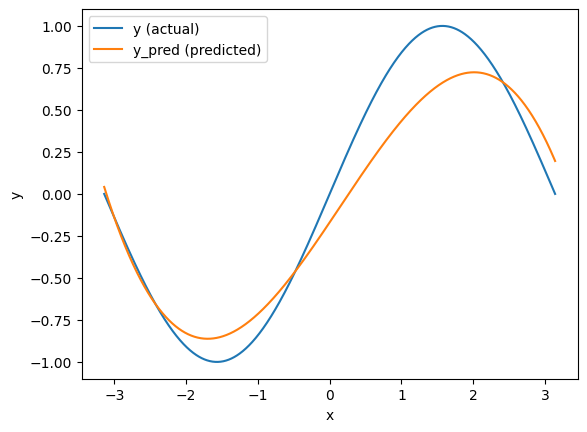

In [98]:
import torch
import math


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 1000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-3
epochs = 2000
for t in range(epochs):
    # Forward pass: compute predicted y
    y_pred = a + b*x + c*x**2 + d*x**3

    # Compute and print loss
    diff = y_pred - y
    loss = ((diff)**2).mean()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    dl_dy = 2*diff
    grad_a = dl_dy.mean()
    grad_b = (dl_dy * x).mean()
    grad_c = (dl_dy * (x**2)).mean()
    grad_d = (dl_dy * (x**3)).mean()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

# Check with the plot!
plot(y_pred, y, x)

## Autograd
### PyTorch: Tensors and autograd
In the above examples, we had to manually implement both the forward and backward passes of our neural network. Manually implementing the backward pass is not a big deal for a small two-layer network, but can quickly get very hairy for large complex networks.

Thankfully, we can use automatic differentiation to automate the computation of backward passes in neural networks. The autograd package in PyTorch provides exactly this functionality. When using autograd, the forward pass of your network will define a computational graph; nodes in the graph will be Tensors, and edges will be functions that produce output Tensors from input Tensors. Backpropagating through this graph then allows you to easily compute gradients.

This sounds complicated, it’s pretty simple to use in practice. Each Tensor represents a node in a computational graph. If x is a Tensor that has x.requires_grad=True then x.grad is another Tensor holding the gradient of x with respect to some scalar value.

Here we use PyTorch Tensors and autograd to implement our fitting sine wave with third order polynomial example; now we no longer need to manually implement the backward pass through the network:

99 1.8995182514190674
199 1.5804834365844727
299 1.3170524835586548
399 1.0979156494140625
499 0.9155784845352173
599 0.7638224363327026
699 0.6374868750572205
799 0.5322883725166321
899 0.44466912746429443
999 0.37167394161224365
1099 0.31084758043289185
1199 0.2601498067378998
1299 0.21788443624973297
1399 0.1826408952474594
1499 0.1532459259033203
1599 0.12872377038002014
1699 0.10826237499713898
1799 0.0911855548620224
1899 0.07693062722682953
1999 0.06502878665924072
Result: y = 0.3324663043022156 + 0.709900438785553 x + -0.057296182960271835 x^2 + -0.07244182378053665 x^3


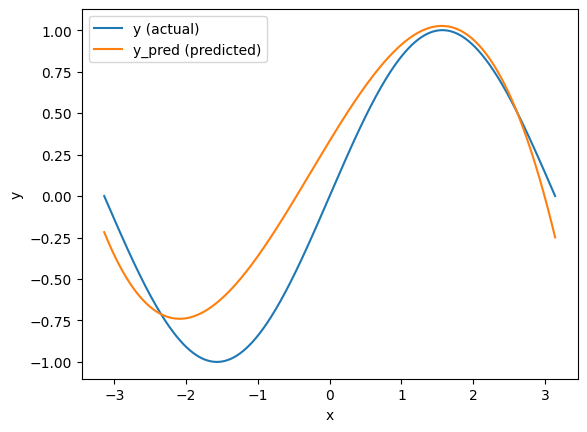

In [99]:
# Here You must use AUTOGRAD, ie, no need to calculate by hand the gradient.
import torch
import math

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 1000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-3
epochs = 2000
for t in range(epochs):
    # Forward pass: compute predicted y using operations on Tensors. (same as above)
    y_pred = a + b*x + c*x**2 + d*x**3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = ((y_pred - y)**2).mean()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        # You can assign None or torch.zeros_like(a)
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

# Check with the plot!
y_pred = y_pred.detach().numpy()
plot(y_pred, y, x)

## nn module
### PyTorch: nn
Computational graphs and autograd are a very powerful paradigm for defining complex operators and automatically taking derivatives; however for large neural networks raw autograd can be a bit too low-level.

When building neural networks we frequently think of arranging the computation into layers, some of which have learnable parameters which will be optimized during learning.

In TensorFlow, packages like Keras, TensorFlow-Slim, and TFLearn provide higher-level abstractions over raw computational graphs that are useful for building neural networks.

In PyTorch, the nn package serves this same purpose. The nn package defines a set of Modules, which are roughly equivalent to neural network layers. A Module receives input Tensors and computes output Tensors, but may also hold internal state such as Tensors containing learnable parameters. The nn package also defines a set of useful loss functions that are commonly used when training neural networks.

In this example we use the nn package to implement our polynomial model network:

99 0.4722110629081726
199 0.38441571593284607
299 0.313742995262146
399 0.2562240958213806
499 0.2094092220067978
599 0.17130514979362488
699 0.14028993248939514
799 0.11504383385181427
899 0.09449303895235062
999 0.07776365429162979
1099 0.06414453685283661
1199 0.053056925535202026
1299 0.04402998462319374
1399 0.03668034449219704
1499 0.030696049332618713
1599 0.025823283940553665
1699 0.021855369210243225
1799 0.018624182790517807
1899 0.015992704778909683
1999 0.013849582523107529
Result: y = 0.035369325429201126 + 0.7269904017448425 x + -0.006095436401665211 x^2 + -0.07487029582262039 x^3


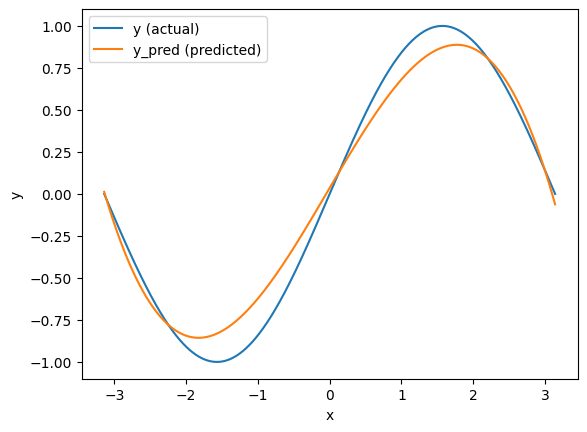

In [105]:
# Complete the ??? and the ...
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 1000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)
# In the above code,
# x.unsqueeze(-1) has shape  ??? [1000]
# p has shape ??? [3],
# For this case, broadcasting semantics will apply to obtain a tensor
# xx of shape ??? [1000, 3]

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    # Important note: Linear contains a matrix that is always applied to the last dimension of a tensor.
    torch.nn.Linear(3, 1),
    # After the linear layer, the shape is ... {1000, 1}
    # Note: Flatten default arguments are Flatten(start_dim = 1, end_dim = -1)
    # By default, start_dim = 1 because 0 corresponds to the batch dimension.
    # We use flatten because we want the final tensor to match the shape of y.
    torch.nn.Flatten(start_dim=0, end_dim=1)
    # After the flatten layer, the shape is ... {1000}
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='mean')

learning_rate = 1e-3
epochs = 2000
for t in range(epochs):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

# Check with the plot!
y_pred = y_pred.detach().numpy()
plot(y_pred, y, x)

## PyTorch: optim
Up to this point we have updated the weights of our models by manually mutating the Tensors holding learnable parameters with torch.no_grad(). This is not a huge burden for simple optimization algorithms like stochastic gradient descent, but in practice we often train neural networks using more sophisticated optimizers like AdaGrad, RMSProp, Adam, etc.

The optim package in PyTorch abstracts the idea of an optimization algorithm and provides implementations of commonly used optimization algorithms.

In this example we will use the nn package to define our model as before, but we will optimize the model using the RMSprop algorithm provided by the optim package:

99 0.1943463236093521
199 0.15816941857337952
299 0.1301024854183197
399 0.10717561841011047
499 0.08844473212957382
599 0.07313966006040573
699 0.06063195317983627
799 0.05040878430008888
899 0.042051687836647034
999 0.03521885722875595
1099 0.02963157929480076
1199 0.02506193146109581
1299 0.02132401615381241
1399 0.018265871331095695
1499 0.015763426199555397
1599 0.013715339824557304
1699 0.01203886978328228
1799 0.010666267946362495
1899 0.009542260318994522
1999 0.008621621876955032
Result: y = 0.04875725135207176 + 0.7794780731201172 x + -0.008402668870985508 x^2 + -0.08232869952917099 x^3


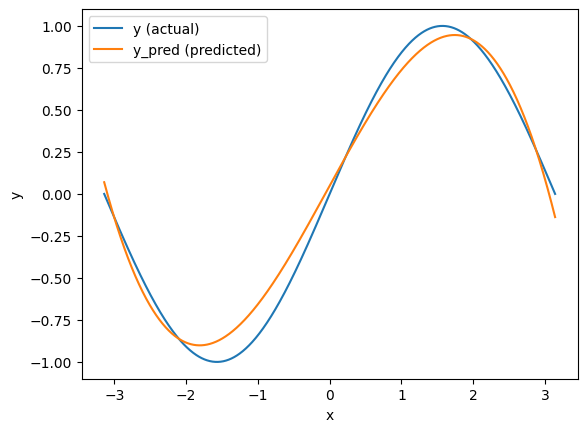

In [106]:
# Adapt the Above code to use torch.optim.SGD
# You can read back the quick start https://pytorch.org/tutorials/beginner/basics/intro.html
# Complete the ??? and the ...
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 1000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    # By default, start_dim = 1 because 0 corresponds to the batch dimension.
    # We use flatten because we want the final tensor to match the shape of y.
    torch.nn.Flatten(start_dim=0, end_dim=1)
)

loss_fn = torch.nn.MSELoss(reduction='mean')
learning_rate = 1e-3
optim = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 2000
for t in range(epochs):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent
    optim.step()
    optim.zero_grad()

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

# Check with the plot!
y_pred = y_pred.detach().numpy()
plot(y_pred, y, x)